In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read atlases

In [2]:
#HPA atlases
tpm_rnaAtlas = pd.read_csv('tpm_rnaAtlas.csv')
ntpm_rnaAtlas = pd.read_csv('ntpm_rnaAtlas.csv')
ptpm_rnaAtlas = pd.read_csv('ptpm_rnaAtlas.csv')
abAtlas = pd.read_csv('antibody_atlas.csv')
#NSAF atlases
ms_atlas_no_abundant = pd.read_csv('ms_atlas_no_abundant_sorted.csv', sep=',')
ms_atlas_filter_no_abundant = pd.read_csv('ms_atlas_filter_no_abundant_sorted.csv', sep=',')
ms_atlas = pd.read_csv('ms_atlas_sorted.csv', sep=',')
ms_atlas_filter = pd.read_csv('ms_atlas_filter_sorted.csv', sep=',')

In [3]:
ms_atlas_no_abundant = ms_atlas_no_abundant.rename(columns={'uniprot_id': 'Uniprot_id'})
ms_atlas_filter_no_abundant = ms_atlas_filter_no_abundant.rename(columns={'uniprot_id': 'Uniprot_id'})
ms_atlas = ms_atlas.rename(columns={'uniprot_id': 'Uniprot_id'})
ms_atlas_filter = ms_atlas_filter.rename(columns={'uniprot_id': 'Uniprot_id'})
abAtlas = abAtlas.rename(columns={'uniprot_id': 'Uniprot_id'})


In [4]:
ms_atlas['NSAF_random'] = np.random.uniform(low=0, high=1, size=ms_atlas.shape[0])
ms_atlas_filter['NSAF_random'] = np.random.uniform(low=0, high=1, size=ms_atlas_filter.shape[0])
ms_atlas_no_abundant['NSAF_random'] = np.random.uniform(low=0, high=1, size=ms_atlas_no_abundant.shape[0])
ms_atlas_filter_no_abundant['NSAF_random'] = np.random.uniform(low=0, high=1, size=ms_atlas_filter_no_abundant.shape[0])

## Comparison on organ level

In [5]:
comp = pd.DataFrame(columns=['comparison', 'level','kendall (mean)', 'kendall (stdev)' ])

hpa_atlases = [abAtlas,ntpm_rnaAtlas]
hpa_names=['antibody', 'RNA (nTPM)']
hpa_values = ['Level','nTPM']
protein_expression_atlases = [ms_atlas, ms_atlas_filter, ms_atlas_no_abundant, ms_atlas_filter_no_abundant]
protein_expression_names = ['PexAt', 'fPexAt', 'PexAt_abundant', 'fPexAt_abundant']
i = 0
for hpa_atlas, hpa_name, hpa_value in zip(hpa_atlases, hpa_names, hpa_values):
    for prot_atlas, prot_name in zip(protein_expression_atlases, protein_expression_names):
        row = []

        print('comparison of {} and {}'.format(hpa_name, prot_name))
        row.append(hpa_name+' - '+prot_name)
        df = pd.merge(hpa_atlas, prot_atlas, on=['Uniprot_id', 'Organ_id'], how='inner')
        df = df[df['NSAF'].notna()]
        
        #first comparison on organ level
        organ = df['Organ_id'].unique()
        row.append('Organ')
        organsDict = {elem : pd.DataFrame for elem in organ}
        for key in organsDict.keys():
            organsDict[key] = df[:][df['Organ_id'] == key]

        sc_list = [] #determine pearson correlation coefficients for each organ btw the NSAF and expression level value
        ps_list = []
        kendall_list = []

        for key in organsDict.keys():
            kendall = organsDict[key]['NSAF'].corr(organsDict[key][hpa_value], method = 'kendall')
            kendall_list.append(kendall)
        list_of_corrs = [kendall_list]
        names = ['kendall']

        for corr, name in zip(list_of_corrs, names):
            corr_array = np.asarray(corr)
            corr_array = corr_array[np.logical_not(np.isnan(corr_array))]
            row.append(corr_array.tolist())
            row.append(corr_array.std())
                
        comp.loc[len(comp)] = row


comparison of antibody and PexAt
comparison of antibody and fPexAt
comparison of antibody and PexAt_abundant
comparison of antibody and fPexAt_abundant
comparison of RNA (nTPM) and PexAt
comparison of RNA (nTPM) and fPexAt
comparison of RNA (nTPM) and PexAt_abundant
comparison of RNA (nTPM) and fPexAt_abundant


In [6]:
hpa_atlases = [abAtlas,ntpm_rnaAtlas]
hpa_names=['antibody', 'RNA (nTPM)']
hpa_values = ['Level','nTPM']

protein_expression_atlases = [ms_atlas, ms_atlas_filter, ms_atlas_no_abundant, ms_atlas_filter_no_abundant]
protein_expression_names =  ['random PexAt', 'random fPexAt', 'random PexAt_abundant', 'random fPexAt_abundant']
i=0
for hpa_atlas, hpa_name, hpa_value in zip(hpa_atlases, hpa_names, hpa_values):
    for prot_atlas, prot_name in zip(protein_expression_atlases, protein_expression_names):
        row = []

        print('comparison of {} and {}'.format(hpa_name, prot_name))
        row.append(hpa_name+' - '+prot_name)
        df = pd.merge(hpa_atlas, prot_atlas, on=['Uniprot_id', 'Organ_id'], how='inner')
        df = df[df['NSAF_random'].notna()]
        
        #first comparison on organ level
        organ = df['Organ_id'].unique()
        row.append('Organ')
        organsDict = {elem : pd.DataFrame for elem in organ}
        for key in organsDict.keys():
            organsDict[key] = df[:][df['Organ_id'] == key]

        sc_list = [] #determine pearson correlation coefficients for each organ btw the NSAF_random and expression level value
        ps_list = []
        kendall_list = []

        for key in organsDict.keys():
            kendall = organsDict[key]['NSAF_random'].corr(organsDict[key][hpa_value], method = 'kendall')
            kendall_list.append(kendall)
        list_of_corrs = [kendall_list]
        names = ['kendall']

        for corr, name in zip(list_of_corrs, names):
            corr_array = np.asarray(corr)
            corr_array = corr_array[np.logical_not(np.isnan(corr_array))]
            row.append(corr_array.tolist())
            row.append(corr_array.std())
                
        comp.loc[len(comp)] = row


comparison of antibody and random PexAt
comparison of antibody and random fPexAt
comparison of antibody and random PexAt_abundant
comparison of antibody and random fPexAt_abundant
comparison of RNA (nTPM) and random PexAt
comparison of RNA (nTPM) and random fPexAt
comparison of RNA (nTPM) and random PexAt_abundant
comparison of RNA (nTPM) and random fPexAt_abundant


In [7]:
comp

,comparison,level,kendall (mean),kendall (stdev)
0,antibody - PexAt,Organ,"[0.05909221181199853, 0.05017591739871727, 0.0...",0.128659
1,antibody - fPexAt,Organ,"[-0.004068523853093484, -0.08224904075569014, ...",0.071822
2,antibody - PexAt_abundant,Organ,"[0.06055020520981424, 0.04606490617933488, 0.0...",0.033318
3,antibody - fPexAt_abundant,Organ,"[0.0005323999234127375, -0.0727301257893653, 0...",0.094702
4,RNA (nTPM) - PexAt,Organ,"[0.2584420813498682, 0.25991653577725327, 0.21...",0.050395
5,RNA (nTPM) - fPexAt,Organ,"[0.232298468277482, 0.27271005732090253, 0.210...",0.083508
6,RNA (nTPM) - PexAt_abundant,Organ,"[0.2560908731291427, 0.26155105742843693, 0.21...",0.046055
7,RNA (nTPM) - fPexAt_abundant,Organ,"[0.20590119686443378, 0.2690931923958845, 0.19...",0.116329
8,antibody - random PexAt,Organ,"[0.005340690335683962, 0.005909832085741988, -...",0.025629
9,antibody - random fPexAt,Organ,"[0.008263223203662644, 0.012395364449336194, 0...",0.051502


[Text(0, 0, 'antibody - PexAt'),
 Text(0, 0, 'antibody - fPexAt'),
 Text(0, 0, 'antibody - PexAt_abundant'),
 Text(0, 0, 'antibody - fPexAt_abundant'),
 Text(0, 0, 'RNA (nTPM) - PexAt'),
 Text(0, 0, 'RNA (nTPM) - fPexAt'),
 Text(0, 0, 'RNA (nTPM) - PexAt_abundant'),
 Text(0, 0, 'RNA (nTPM) - fPexAt_abundant'),
 Text(0, 0, 'antibody - random PexAt'),
 Text(0, 0, 'antibody - random fPexAt'),
 Text(0, 0, 'antibody - random PexAt_abundant'),
 Text(0, 0, 'antibody - random fPexAt_abundant'),
 Text(0, 0, 'RNA (nTPM) - random PexAt'),
 Text(0, 0, 'RNA (nTPM) - random fPexAt'),
 Text(0, 0, 'RNA (nTPM) - random PexAt_abundant'),
 Text(0, 0, 'RNA (nTPM) - random fPexAt_abundant')]

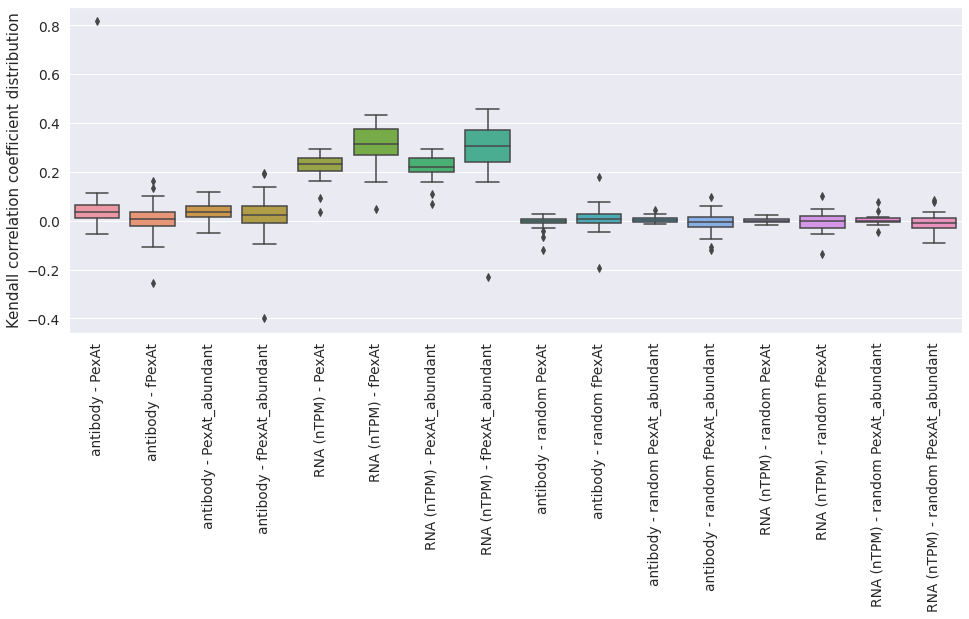

In [12]:
all_arrays = comp['kendall (mean)'].to_list()
comparisons = comp['comparison'].to_list()
sns.set_theme(style='whitegrid')
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(16,6))
ax = sns.boxplot(ax=ax, data=all_arrays)
ax.set(ylabel='Kendall correlation coefficient distribution')
ax.set_xticklabels(comparisons, rotation=90)
#ax.set_title("Kendall correlation coefficient distribution over organs comparing HPA and MS protein expression")

## Comparison on protein level

In [15]:
comp2 = pd.DataFrame(columns=['comparison', 'level', 'kendall (mean)', 'kendall (stdev)' ])
hpa_atlases = [abAtlas,ntpm_rnaAtlas]
hpa_names=['antibody', 'RNA (nTPM)']
hpa_values = ['Level','nTPM']

protein_expression_atlases = [ms_atlas, ms_atlas_filter, ms_atlas_no_abundant, ms_atlas_filter_no_abundant]
protein_expression_names = ['PexAt', 'fPexAt', 'PexAt_abundant', 'fPexAt_abundant']
i = 0
for hpa_atlas, hpa_name, hpa_value in zip(hpa_atlases, hpa_names, hpa_values):
    for prot_atlas, prot_name in zip(protein_expression_atlases, protein_expression_names):
        i += 1
        plt.figure(i)
        row = []

        print('comparison of {} and {}'.format(hpa_name, prot_name))
        row.append(hpa_name+' - '+prot_name)
        df = pd.merge(hpa_atlas, prot_atlas, on=['Uniprot_id', 'Organ_id'], how='inner')
        df = df[df['NSAF'].notna()]
        #second comparison on protein level
        proteins = df['Uniprot_id'].unique()
        row.append('Protein')
        proteinsDict = {elem : pd.DataFrame for elem in proteins}
        for key in proteinsDict.keys():
            proteinsDict[key] = df[:][df['Uniprot_id'] == key]

        sc_list = [] #determine pearson correlation coefficients for each organ btw the NSAF and expression level value
        ps_list = []
        kendall_list = []

        for key in proteinsDict.keys():
            kendall = proteinsDict[key]['NSAF'].corr(proteinsDict[key][hpa_value], method = 'kendall')
            kendall_list.append(kendall)
        list_of_corrs = [kendall_list]
        names = ['kendall']

        for corr, name in zip(list_of_corrs, names):
            corr_array = np.asarray(corr)
            corr_array = corr_array[np.logical_not(np.isnan(corr_array))]
            row.append(corr_array.tolist())
            row.append(corr_array.std())
                
        comp2.loc[len(comp2)] = row

comparison of antibody and PexAt
comparison of antibody and fPexAt
comparison of antibody and PexAt_abundant
comparison of antibody and fPexAt_abundant
comparison of RNA (nTPM) and PexAt
comparison of RNA (nTPM) and fPexAt
comparison of RNA (nTPM) and PexAt_abundant
comparison of RNA (nTPM) and fPexAt_abundant


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [16]:
hpa_atlases = [abAtlas,ntpm_rnaAtlas]
hpa_names=['antibody', 'RNA (nTPM)']
hpa_values = ['Level','nTPM']


protein_expression_atlases = [ms_atlas, ms_atlas_filter, ms_atlas_no_abundant, ms_atlas_filter_no_abundant]
protein_expression_names =  ['random PexAt', 'random fPexAt', 'random PexAt_abundant', 'random fPexAt_abundant']
i=0
for hpa_atlas, hpa_name, hpa_value in zip(hpa_atlases, hpa_names, hpa_values):
    for prot_atlas, prot_name in zip(protein_expression_atlases, protein_expression_names):
        i += 1
        plt.figure(i)
        row = []

        print('comparison of {} and {}'.format(hpa_name, prot_name))
        row.append(hpa_name+' - '+prot_name)
        df = pd.merge(hpa_atlas, prot_atlas, on=['Uniprot_id', 'Organ_id'], how='inner')
        df = df[df['NSAF_random'].notna()]
        #second comparison on protein level
        proteins = df['Uniprot_id'].unique()
        row.append('Protein')
        proteinsDict = {elem : pd.DataFrame for elem in proteins}
        for key in proteinsDict.keys():
            proteinsDict[key] = df[:][df['Uniprot_id'] == key]

        sc_list = [] #determine pearson correlation coefficients for each organ btw the NSAF_random and expression level value
        ps_list = []
        kendall_list = []

        for key in proteinsDict.keys():
            kendall = proteinsDict[key]['NSAF_random'].corr(proteinsDict[key][hpa_value], method = 'kendall')
            kendall_list.append(kendall)
        list_of_corrs = [kendall_list]
        names = ['kendall']

        for corr, name in zip(list_of_corrs, names):
            corr_array = np.asarray(corr)
            corr_array = corr_array[np.logical_not(np.isnan(corr_array))]
            row.append(corr_array.tolist())
            row.append(corr_array.std())
                
        comp2.loc[len(comp2)] = row

comparison of antibody and random PexAt
comparison of antibody and random fPexAt
comparison of antibody and random PexAt_abundant
comparison of antibody and random fPexAt_abundant
comparison of RNA (nTPM) and random PexAt
comparison of RNA (nTPM) and random fPexAt
comparison of RNA (nTPM) and random PexAt_abundant
comparison of RNA (nTPM) and random fPexAt_abundant


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
comp2

,comparison,level,kendall (mean),kendall (stdev)
0,antibody - PexAt,Protein,"[-0.09228449566144904, 0.20307912740410933, -0...",0.262258
1,antibody - fPexAt,Protein,"[-0.0543348102875866, 1.0, -1.0, -0.8164965809...",0.519924
2,antibody - PexAt_abundant,Protein,"[-0.09228449566144904, 0.114783854619714, -0.1...",0.261464
3,antibody - fPexAt_abundant,Protein,"[-0.12678122400436873, 1.0, -1.0, -0.816496580...",0.520215
4,RNA (nTPM) - PexAt,Protein,"[-0.13659232596993998, 0.7920361680095124, -0....",0.311158
5,RNA (nTPM) - fPexAt,Protein,"[-1.0, 1.0, -0.5477225575051662, -0.3333333333...",0.537521
6,RNA (nTPM) - PexAt_abundant,Protein,"[-0.13659232596993998, 0.7964445799452979, -0....",0.313486
7,RNA (nTPM) - fPexAt_abundant,Protein,"[-1.0, 1.0, -0.5477225575051662, -0.3333333333...",0.541244
8,antibody - random PexAt,Protein,"[-0.04969165151001102, -0.29137440018850475, -...",0.251605
9,antibody - random fPexAt,Protein,"[-0.18111603429195533, 1.0, 1.0, 0.81649658092...",0.513040


[Text(0, 0, 'antibody - PexAt'),
 Text(0, 0, 'antibody - fPexAt'),
 Text(0, 0, 'antibody - PexAt_abundant'),
 Text(0, 0, 'antibody - fPexAt_abundant'),
 Text(0, 0, 'RNA (nTPM) - PexAt'),
 Text(0, 0, 'RNA (nTPM) - fPexAt'),
 Text(0, 0, 'RNA (nTPM) - PexAt_abundant'),
 Text(0, 0, 'RNA (nTPM) - fPexAt_abundant'),
 Text(0, 0, 'antibody - random PexAt'),
 Text(0, 0, 'antibody - random fPexAt'),
 Text(0, 0, 'antibody - random PexAt_abundant'),
 Text(0, 0, 'antibody - random fPexAt_abundant'),
 Text(0, 0, 'RNA (nTPM) - random PexAt'),
 Text(0, 0, 'RNA (nTPM) - random fPexAt'),
 Text(0, 0, 'RNA (nTPM) - random PexAt_abundant'),
 Text(0, 0, 'RNA (nTPM) - random fPexAt_abundant')]

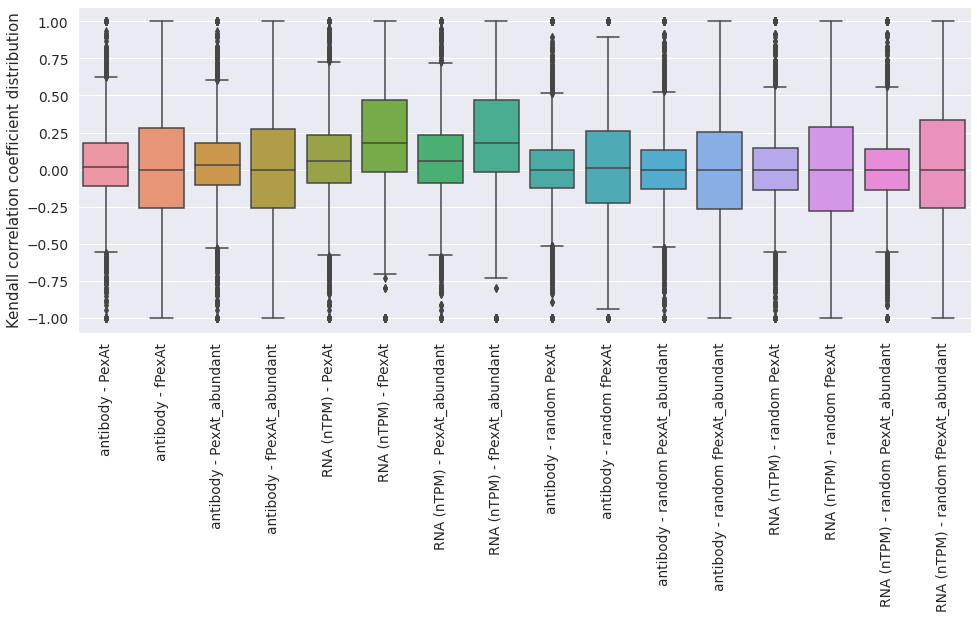

In [19]:
all_arrays = comp2['kendall (mean)'].to_list()
comparisons = comp2['comparison'].to_list()
sns.set_theme(style='whitegrid')
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(16,6))
ax = sns.boxplot(ax=ax, data=all_arrays)
ax.set(ylabel='Kendall correlation coefficient distribution')
ax.set_xticklabels(comparisons, rotation=90)
#ax.set_title("Kendall correlation coefficient distribution over proteins comparing HPA and MS protein expression")